In [1]:
'''Import packages for loading data, analysing, and plotting'''
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import regionmask
import pandas as pd
import cartopy
import cartopy.crs as ccrs

from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as colors

import numpy.ma as ma

from matplotlib.ticker import AutoMinorLocator

from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.filterwarnings("ignore")

# AR6 Regions

In [2]:
regionmask.defined_regions.ar6.all

<regionmask.Regions>
Name:     AR6 reference regions
Source:   Iturbide et al., 2020 (Earth Syst. Sci. Data)

Regions:
  0  GIC       Greenland/Iceland
  1  NWN       N.W.North-America
  2  NEN       N.E.North-America
  3  WNA         W.North-America
  4  CNA         C.North-America
..   ...                     ...
 53  ARS             Arabian-Sea
 54  BOB           Bay-of-Bengal
 55  EIO  Equatorial.Indic-Ocean
 56  SIO           S.Indic-Ocean
 57  SOO          Southern-Ocean

[58 regions]

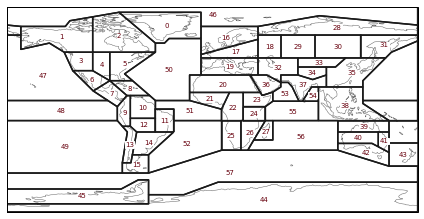

In [3]:
text_kws = dict(color="#67000d", fontsize=7, bbox=dict(pad=0.2, color="w"))
regionmask.defined_regions.ar6.all.plot(text_kws=text_kws);
plt.tight_layout()

# Computing and plotting the tas timeseries under ssp126 &ssp585 scenario & historical runs directly from UKESM1 output

#### required UKESM1 tas data can be downloded from the geography server:

#### historical runs:
/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc

/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc

#### ssp126:
/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp126/r1i1p1f2/Amon/tas/gn/v20190503/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_201501-204912.nc

/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp126/r1i1p1f2/Amon/tas/gn/v20190503/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_205001-210012.nc

#### ssp585:
/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/v20190507/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc

/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/Amon/tas/gn/v20190507/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc


In [31]:
# Download and load the historical/ssp126 UKESM1 output
# then combine then into one single file which covers the time period from 1850-2100

dirc1='../../../Documents/PGTA_climate_modelling/UKESM1'
f1='%s/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'%dirc1
f2='%s/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'%dirc1 #historical run, year 1850-2014

dirc2='../../../Documents/PGTA_climate_modelling/UKESM1'
f3='%s/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_201501-204912.nc'%dirc2
f4='%s/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_205001-210012.nc'%dirc2 #year 2015-2100 under ssp126 scenario

file_1=[f1,f2,f3,f4]

load_data_1=xr.open_mfdataset(paths=file_1,combine='by_coords')
print(load_data_1)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 3012)
Coordinates:
    height     float64 1.5
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * time       (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(1200, 144, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-04-05T1

In [32]:
# Download and load the ssp585 UKESM1 output
# DO NOT combine with file_1 above, as they both covers 2015-2100

dirc3='../../../Documents/PGTA_climate_modelling/UKESM1'
f5='%s/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc'%dirc3
f6='%s/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'%dirc3 #year 2015-2100 under ssp585 scenario

file_2=[f5,f6]

load_data_2=xr.open_mfdataset(paths=file_2,combine='by_coords')
print(load_data_2)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1032)
Coordinates:
    height     float64 1.5
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * time       (time) object 2015-01-16 00:00:00 ... 2100-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(420, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(420, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(420, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(420, 144, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2019-0

In [33]:
# load the variables in file_1 and file_2 separately

tas_1=load_data_1.tas
lat_1=load_data_1.lat
lon_1=load_data_1.lon

tas_2=load_data_2.tas
lat_2=load_data_2.lat
lon_2=load_data_2.lon

In [35]:
# This shows the abbrevs of the defined AR6 regions

mask_1 = regionmask.defined_regions.ar6.all.mask(load_data_1)

reg = np.unique(mask_1.values)
reg = reg[~np.isnan(reg)]
abbrevs = regionmask.defined_regions.ar6.all[reg].abbrevs
print(abbrevs)

['GIC', 'NWN', 'NEN', 'WNA', 'CNA', 'ENA', 'NCA', 'SCA', 'CAR', 'NWS', 'NSA', 'NES', 'SAM', 'SWS', 'SES', 'SSA', 'NEU', 'WCE', 'EEU', 'MED', 'SAH', 'WAF', 'CAF', 'NEAF', 'SEAF', 'WSAF', 'ESAF', 'MDG', 'RAR', 'WSB', 'ESB', 'RFE', 'WCA', 'ECA', 'TIB', 'EAS', 'ARP', 'SAS', 'SEA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ', 'EAN', 'WAN', 'ARO', 'NPO', 'EPO', 'SPO', 'NAO', 'EAO', 'SAO', 'ARS', 'BOB', 'EIO', 'SIO', 'SOO']


In [36]:
mask_2 = regionmask.defined_regions.ar6.all.mask(load_data_2)

In [37]:
# can also use nunmber for refering AR6 regions
regionmask.defined_regions.ar6.all.map_keys('NEU')

16

In [38]:
# create some weights for the temperatures
# for data in file_1 

weight_1=tas_1[0,:,:] #using tas to copy over metadata  #select the 1st timestep
weight_1.values=np.ones((144,192)) 
for i in range(0,144):           
    w=lat_1[i].values*np.pi/180
    wc=np.cos(w)
    weight_1.values[i,:]=np.repeat(wc,192)
    

#create and fill an array of global mean temperatures
gmt_1=np.zeros ((3012,144,192))  
for t in range (0,3012):   #apply the weight values calculated from the 1st timestep to all 3012 timesteps
    gmt_1[t]=np.average(tas_1[t,:,:],weights=weight_1)

#Put that information back into a plottable array
tas_ave_1=tas_1 #using this subsetting approach to maintain metadata
tas_ave_1.values=gmt_1  #now overwrite the data in the tas_ave_1 array

print(tas_ave_1)

<xarray.DataArray 'tas' (time: 3012, lat: 144, lon: 192)>
array([[[284.11336349, 284.11336349, 284.11336349, ..., 284.11336349,
         284.11336349, 284.11336349],
        [284.11336349, 284.11336349, 284.11336349, ..., 284.11336349,
         284.11336349, 284.11336349],
        [284.11336349, 284.11336349, 284.11336349, ..., 284.11336349,
         284.11336349, 284.11336349],
        ...,
        [284.11336349, 284.11336349, 284.11336349, ..., 284.11336349,
         284.11336349, 284.11336349],
        [284.11336349, 284.11336349, 284.11336349, ..., 284.11336349,
         284.11336349, 284.11336349],
        [284.11336349, 284.11336349, 284.11336349, ..., 284.11336349,
         284.11336349, 284.11336349]],

       [[284.36392231, 284.36392231, 284.36392231, ..., 284.36392231,
         284.36392231, 284.36392231],
        [284.36392231, 284.36392231, 284.36392231, ..., 284.36392231,
         284.36392231, 284.36392231],
        [284.36392231, 284.36392231, 284.36392231, ..., 284.363

In [39]:
#for data in file_2

weight_2=tas_2[0,:,:] 
weight_2.values=np.ones((144,192)) 
for i in range(0,144):           
    w=lat_2[i].values*np.pi/180
    wc=np.cos(w)
    weight_2.values[i,:]=np.repeat(wc,192)
    

gmt_2=np.zeros ((1032,144,192))  
for t in range (0,1032):   
    gmt_2[t]=np.average(tas_2[t,:,:],weights=weight_2)


tas_ave_2=tas_2 
tas_ave_2.values=gmt_2

Text(0.5, 1.0, 'NEU tas timeseries')

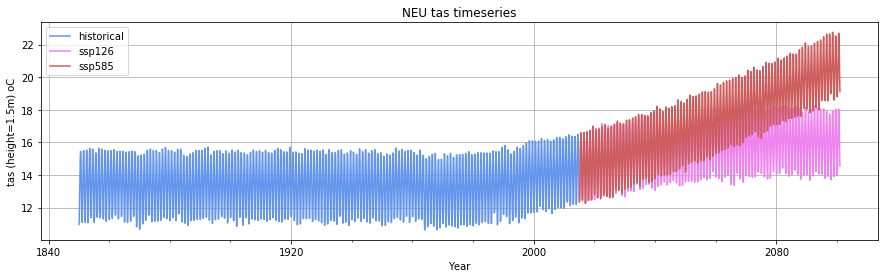

In [41]:
# first, mask the 'NEU'--Northern Europe region
# then, take the 'lat' &'lon' averages, only remian 1 coordinate --'time'

#file_1 data
tas_neu_1 = tas_ave_1.where(mask_1 == 16)
tas_neu_h_126 = tas_neu_1.mean(dim=('lat', 'lon')) - 273.15  #convert units: from K to oC
#separate historical runs and ssp126 runs for plotting
tas_neu_h = tas_neu_h_126.sel(time=slice('1850-01-16','2014-12-16'))
tas_neu_126 = tas_neu_h_126.sel(time=slice('2015-01-16','2100-12-16'))


#file_2 data
tas_neu_2 = tas_ave_2.where(mask_2 == 16)
tas_neu_585 = tas_neu_2.mean(dim=('lat', 'lon')) - 273.15 


# do the line plot

fig, ax = plt.subplots(figsize=(15,4))
tas_neu_h.plot(ax=ax, label='historical',color='cornflowerblue')
tas_neu_126.plot(ax=ax, label='ssp126',color='violet')
tas_neu_585.plot(ax=ax, label='ssp585',color='indianred')
ax.grid()

ax.xaxis.set_minor_locator(AutoMinorLocator())
    
ax.legend(loc='best') 
ax.set(xlabel='Year',ylabel='tas (height=1.5m) oC')
plt.title('NEU tas timeseries')

Text(0.5, 1.0, 'NEU tas timeseries (smoothed) ')

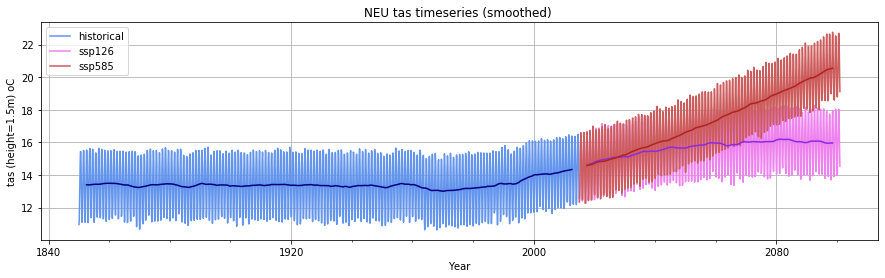

In [43]:
# similar plot as above, but took the 5-year running mean, to smooth the timeseries and remove some internal variablity

tas_neu_1 = tas_ave_1.where(mask_1 == 16)
tas_neu_h_126 = tas_neu_1.mean(dim=('lat', 'lon')) - 273.15  #convert units: from K to oC

tas_neu_h = tas_neu_h_126.sel(time=slice('1850-01-16','2014-12-16'))
tas_neu_126 = tas_neu_h_126.sel(time=slice('2015-01-16','2100-12-16'))


tas_neu_2 = tas_ave_2.where(mask_2 == 16)
tas_neu_585 = tas_neu_2.mean(dim=('lat', 'lon')) - 273.15 


#take the 5-year running mean (i.e. rolling over 60 months)
tas_neu_h_smoothed=tas_neu_h.rolling(time=60,center=True).mean() 
tas_neu_126_smoothed=tas_neu_126.rolling(time=60,center=True).mean()
tas_neu_585_smoothed=tas_neu_585.rolling(time=60,center=True).mean()

# do the line plot
fig, ax = plt.subplots(figsize=(15,4))
tas_neu_h.plot(ax=ax, label='historical',color='cornflowerblue')
tas_neu_126.plot(ax=ax, label='ssp126',color='violet')
tas_neu_585.plot(ax=ax, label='ssp585',color='indianred')

tas_neu_h_smoothed.plot(ax=ax,color='navy')
tas_neu_126_smoothed.plot(ax=ax,color='blueviolet')
tas_neu_585_smoothed.plot(ax=ax,color='firebrick')
ax.grid()

ax.xaxis.set_minor_locator(AutoMinorLocator())
    
ax.legend(loc='best') 
ax.set(xlabel='Year',ylabel='tas (height=1.5m) oC')
plt.title('NEU tas timeseries (smoothed) ')

# Computing and plotting the precipitation map in historical runs directly from UKESM1 output

#### Required UKESM1 pr data can be downloaded from the geography server:

#### historical runs:
/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/pr/gn/v20190406/pr_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc

/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/pr/gn/v20190406/pr_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc

In [67]:
# download and load the ukesm1 historical run 

dirc4='../../../Documents/PGTA_climate_modelling/UKESM1'
f7='%s/pr_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'%dirc4 # pr historical run, year 1850-2014
f8='%s/pr_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'%dirc4
file_pr=[f7,f8]
load_data_4=xr.open_mfdataset(paths=file_pr,combine='by_coords')
print(load_data_4)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1980)
Coordinates:
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(1200, 144, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-04-05T16:01:11Z
    cv_version:   

### Plot 1: time-averaged precipitation map over Eastern North America region (regional map)

In [70]:
pr_data=load_data_4.pr.sel(time=slice('2001-01-16','2014-12-16')) # select a time period
print(pr_data)
pr_1=np.average(pr_data,axis=0)  #take the time-averages
pr_2=pr_1*86400 #convert units: 1 kg/m2/s = 86400 mm/day.

<xarray.DataArray 'pr' (time: 168, lat: 144, lon: 192)>
dask.array<getitem, shape=(168, 144, 192), dtype=float32, chunksize=(168, 144, 192), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * time     (time) object 2001-01-16 00:00:00 ... 2014-12-16 00:00:00
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    original_name:  mo: (stash: m01s05i216, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-04-05T16:01:11Z altered by CMOR: replaced missing va...


In [71]:
regionmask.defined_regions.ar6.all.map_keys('ENA')

5

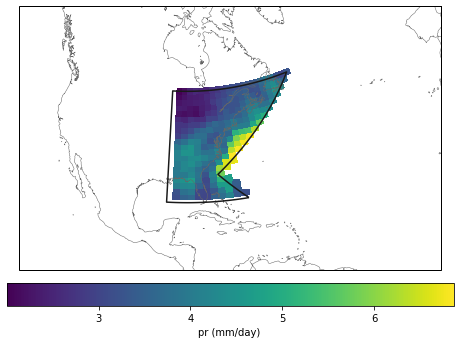

In [72]:
# define a longitude latitude grid
lon = np.linspace(0.9375,359.0625,192)
lat = np.linspace(-89.375, 89.375,144)

# for the plotting
lon_edges = np.linspace(-0.1,360.1,192)
lat_edges = np.linspace(-89.375, 89.375,144)

mask = regionmask.defined_regions.ar6.all.mask(lon, lat).values

# only retain data in the ENA
data_ena = np.ma.masked_where(mask != 5, pr_2)

# choose a good projection for regional maps
proj=ccrs.LambertConformal(central_longitude=-85)

# plot the outline of the Eastern Northern America region
ax=plt.subplots(figsize=(8,6))
ax = regionmask.defined_regions.ar6.all.plot(regions=5, add_ocean=False, resolution='50m',
                          proj=proj, add_label=False)

k=ax.pcolormesh(lon_edges, lat_edges, data_ena, transform=ccrs.PlateCarree())  #if coord choose lat/lon, there will bw a white line along the Meridian
 
# fine tune the extent
ax.set_extent([-120, -30, 10, 60], crs=ccrs.PlateCarree())

cbar=plt.colorbar(k, orientation='horizontal', pad=0.04)

cbar.set_label("pr (mm/day) ")

### Plot 2: precipitaion map at a spcific time over Eastern North America region (global map)

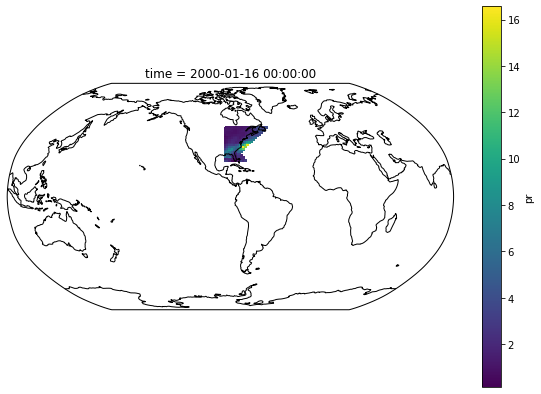

In [74]:
mask = regionmask.defined_regions.ar6.all.mask(load_data_4)
pr_usa = load_data_4.where(mask == 5)  #(mask=='ENA') doesn't work, need use number 

# choose a good projection for regional maps
plt.figure(figsize=(10,7))
proj=ccrs.Robinson(central_longitude=-85)

ax = plt.subplot(111, projection=proj)

# select a specific time (i.e. 2000-1-16)
pr_data_1=pr_usa.isel(time=1800).pr
pr_data=pr_data_1 * 86400

# do the plot
pr_data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()